In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

In [97]:
change_sex = {
    "male": 0,
    "female": 1
}

train_df = pd.read_csv("titanic_challenge/train.csv")

train_df["Sex"] = train_df["Sex"].map(change_sex)
train_df["Age"] = train_df["Age"].fillna(0)
train_df["Fare"] = train_df["Fare"].fillna(0)

train_df_x = train_df[["PassengerId", "Sex", "Age", "Pclass", "SibSp", "Parch"]]
train_df_y = train_df["Survived"]

raw_train_x, raw_test_x, train_y, test_y = train_test_split(train_df_x, train_df_y, stratify=train_df_y, test_size=0.25)

print(f"Training with {len(raw_train_x)} and testing with {len(raw_test_x)}")

Training with 668 and testing with 223


In [98]:
# Baseline
dummy = DummyClassifier()
dummy.fit(raw_train_x, train_y)
dummy_predict = dummy.predict(raw_test_x)
baseline_dummy_accuracy = dummy.score(train_y, train_y)
print(f"Baseline dummy accuracy was {baseline_dummy_accuracy:.2%}")

# Model training
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predict = model.predict(test_x)
accuracy = accuracy_score(test_y, predict)
print(f"Accuracy was {accuracy:.2%}")

Baseline dummy accuracy was 61.68%
Accuracy was 83.41%


In [99]:
frames = [pd.DataFrame(test_y), raw_test_x]
df_titanic_final = pd.concat(frames, axis=1)

change_survived = {
    0: "No",
    1: "Yes"
}

change_sex = {
    0: "male",
    1: "female"
}

change_class = {
    1: "First",
    2: "Second",
    3: "Third"
}

df_titanic_final["Survived"] = df_titanic_final["Survived"].map(change_survived)
df_titanic_final["Sex"] = df_titanic_final["Sex"].map(change_sex)
df_titanic_final["Pclass"] = df_titanic_final["Pclass"].map(change_class)

# Challenge result

In [100]:
df_titanic_final[["PassengerId", "Survived"]].sort_values(by=["PassengerId"])

,PassengerId,Survived
11,12,Yes
12,13,No
16,17,No
27,28,No
29,30,No
...,...,...
872,873,No
874,875,Yes
875,876,Yes
883,884,No


# Percentage to survive by Type

In [101]:
childrens_alive = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 1 and age <= 13 and alive == "Yes"]
childrens_dead = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 1 and age <= 13 and alive == "No"]

teenagers_alive = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 13 and age <= 20 and alive == "Yes"] 
teenagers_dead = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 13 and age <= 20 and alive == "No"] 

adults_alive = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 20 and age <= 60 and alive == "Yes"] 
adults_dead = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 20 and age <= 60 and alive == "No"] 

old_alive = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 60 and alive == "Yes"] 
old_dead = [(int(age), sex, alive) for sex, age, alive in zip(df_titanic_final["Sex"],df_titanic_final["Age"], df_titanic_final["Survived"]) if age > 60 and alive == "No"] 

In [102]:
# All Sex
percent_children = round((len(childrens_alive)/len(childrens_dead)) * 100, 2)
percent_teenager = round((len(teenagers_alive)/len(teenagers_dead)) * 100, 2)
percent_adult = round((len(adults_alive)/len(adults_dead)) * 100, 2)
percent_old = round((len(old_alive)/len(old_dead)) * 100, 2)

df_percentual_to_survive = pd.DataFrame([("Children", percent_children), ("Teenager", percent_teenager), ("Adult", percent_adult), ("Old", percent_old)], columns=["Type", "Percentage"])

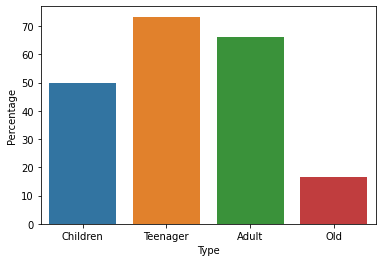

In [103]:
sns.barplot(data=df_percentual_to_survive, x="Type", y="Percentage")

# Survived by Sex

In [124]:
childrens_list = childrens_alive + childrens_dead
teenager_list = teenagers_alive + teenagers_dead
adult_list = adults_alive + adults_dead
old_list = old_alive + old_dead

percentage_sex_frames = [pd.DataFrame(childrens_list, columns=["Age", "Sex", "Survived"]), pd.DataFrame(teenager_list, columns=["Age", "Sex", "Survived"]), pd.DataFrame(adult_list, columns=["Age", "Sex", "Survived"]), pd.DataFrame(old_list, columns=["Age", "Sex", "Survived"])]
df_percentage_sex = pd.concat(percentage_sex_frames, axis=0)

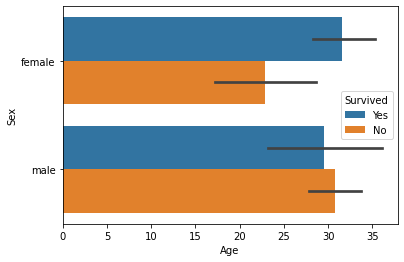

In [130]:
sns.barplot(data=df_percentage_sex, x="Age", y="Sex", hue="Survived")

# How much person by sex and type

In [126]:
percentage_sex_frames = [pd.DataFrame(childrens_list, columns=["Age", "Sex", "Survived"]), pd.DataFrame(teenager_list, columns=["Age", "Sex", "Survived"]), pd.DataFrame(adult_list, columns=["Age", "Sex", "Survived"]), pd.DataFrame(old_list, columns=["Age", "Sex", "Survived"])]
df_percentage_sex = pd.concat(percentage_sex_frames, axis=0)

new_age_column = []
for age in df_percentage_sex["Age"]:
  if age > 1 and age <= 13:
    new_age_column.append("Children")
  elif age > 13 and age <= 20:
    new_age_column.append("Teenager")
  elif age > 20 and age <= 60:
    new_age_column.append("Adult")
  elif age > 60:
    new_age_column.append("Old")

df_percentage_sex["Type"] = new_age_column

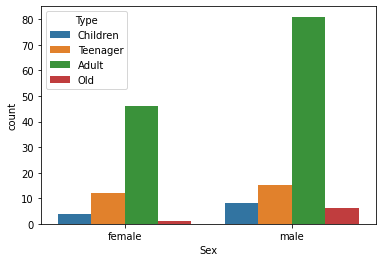

In [127]:
sns.countplot(data=df_percentage_sex, x="Sex", hue="Type")

# Survived by Class

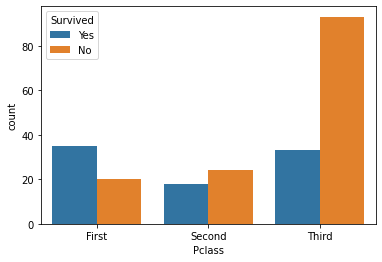

In [106]:
sns.countplot(data=df_titanic_final.sort_values(by=["Pclass"]), x="Pclass", hue="Survived")

# Survived by family relations

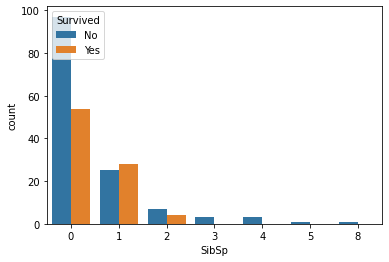

In [107]:
sns.countplot(data=df_titanic_final, x="SibSp", hue="Survived")

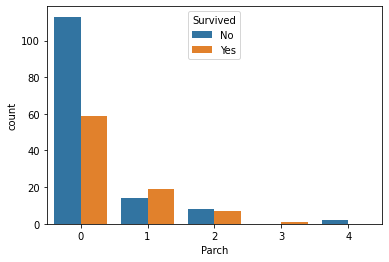

In [108]:
sns.countplot(data=df_titanic_final, x="Parch", hue="Survived")

# How many was in each class

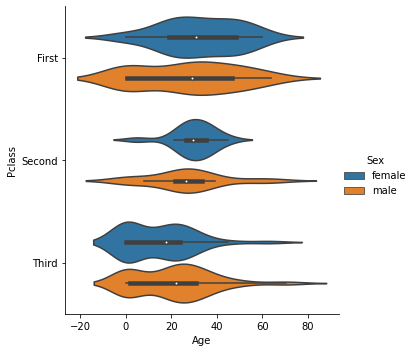

In [114]:
sns.catplot(data=df_titanic_final.sort_values(by=["Pclass"]), x="Age", y="Pclass", hue="Sex",  kind="violin")